# **Task 2: Stock Price Prediction**
Build a model to predict future stock prices based on historical stock data, including
features like opening price, closing price, high, low, and trading volume. Your task is
to preprocess the data, choose a suitable model (e.g., linear regression or LSTM),
train it, and evaluate its prediction accuracy.

# Fetching Apple Inc stock data from Tiingo

In [3]:
pip install git+https://github.com/pydata/pandas-datareader.git

  Cloning https://github.com/pydata/pandas-datareader.git to /tmp/pip-req-build-w_uo9xr6
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/pandas-datareader.git /tmp/pip-req-build-w_uo9xr6
  Resolved https://github.com/pydata/pandas-datareader.git to commit 4ff62149bb24f72d62874477b6688ddb0fd1f97c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [4]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pdr.get_data_tiingo('AAPL',api_key='7a50300b62c7cd60760e9f0444714d7c31c10a7b')
df.to_csv('AAPL.csv')

In [6]:
df = pd.read_csv("AAPL.csv")

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2020-11-23 00:00:00+00:00,113.85,117.6202,113.75,117.18,127959318,110.839202,114.509698,110.741846,114.081139,127959318,0.0,1.0
1,AAPL,2020-11-24 00:00:00+00:00,115.17,115.8500,112.59,113.91,113226248,112.124294,112.786311,109.612523,110.897615,113226248,0.0,1.0
2,AAPL,2020-11-25 00:00:00+00:00,116.03,116.7500,115.17,115.55,76499234,112.961551,113.662510,112.124294,112.494245,76499234,0.0,1.0
3,AAPL,2020-11-27 00:00:00+00:00,116.59,117.4900,116.22,116.57,46691331,113.506742,114.382941,113.146526,113.487270,46691331,0.0,1.0
4,AAPL,2020-11-30 00:00:00+00:00,119.05,120.9700,116.81,116.97,169410176,115.901686,117.770911,113.720924,113.876692,169410176,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1250,AAPL,2025-11-14 00:00:00+00:00,272.41,275.96,269.60,271.050,47431331,272.41,275.96,269.60,271.050,47431331,0.0,1.0
1251,AAPL,2025-11-17 00:00:00+00:00,267.46,270.49,265.73,268.815,45018260,267.46,270.49,265.73,268.815,45018260,0.0,1.0
1252,AAPL,2025-11-18 00:00:00+00:00,267.44,270.71,265.32,269.990,45677278,267.44,270.71,265.32,269.990,45677278,0.0,1.0
1253,AAPL,2025-11-19 00:00:00+00:00,268.56,272.21,265.50,265.525,40424492,268.56,272.21,265.50,265.525,40424492,0.0,1.0
1254,AAPL,2025-11-20 00:00:00+00:00,266.25,275.43,265.92,270.830,45823568,266.25,275.43,265.92,270.830,45823568,0.0,1.0


In [9]:
df1 = df.reset_index()['close'] # rest_index stores index for values

In [10]:
df1.shape

(1255,)

# Visualizing Stock trend with Matplotlib

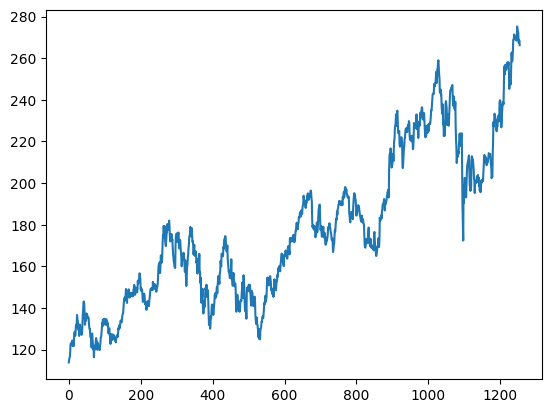

In [11]:
plt.plot(df1)

# Scaling data for LSTM

In [12]:
# Since LSTM is sensitive to the scale of data so we have to apply MinMax scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(1255, 1)

# Train & Test data splitting

In [13]:
training_size = int(len(df1)*0.7)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(878, 377)

# Converting array of values into matrix dataset
We have Timeseries data so it should be ordered w.r.t. date instead of cross validation or random seed(as these are more suitable for linear regression or classifcation problems)

In [15]:
def create_dataset(dataset, time_step=1):
  dataX,dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [16]:
# Reshaping into X=t,t+1,t+2,t+3 & Y=t+4
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)
print(X_train)
print(X_test.shape,y_test.shape)

[[0.         0.00817844 0.01350682 ... 0.127943   0.12583643 0.13004957]
 [0.00817844 0.01350682 0.01697646 ... 0.12583643 0.13004957 0.11933086]
 [0.01350682 0.01697646 0.03221809 ... 0.13004957 0.11933086 0.12174721]
 ...
 [0.50080545 0.494114   0.49070632 ... 0.44876084 0.455886   0.47007435]
 [0.494114   0.49070632 0.4913259  ... 0.455886   0.47007435 0.47081784]
 [0.49070632 0.4913259  0.49399009 ... 0.47007435 0.47081784 0.47100372]]
(276, 100) (276,)


In [17]:
# Reshaping input to be [samples, time steps, features] reqd by LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# Training Stacked LSTM model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - loss: 0.0467 - val_loss: 0.0903
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 230ms/step - loss: 0.0081 - val_loss: 0.0169
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - loss: 0.0038 - val_loss: 0.0272
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - loss: 0.0027 - val_loss: 0.0148
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - loss: 0.0021 - val_loss: 0.0081
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - loss: 0.0021 - val_loss: 0.0053
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - loss: 0.0018 - val_loss: 0.0051
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 0.0018 - val_loss: 0.0045
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 0.0017 - val_loss: 0.0056
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3

# Prediction & Performance evaluation of model

In [22]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [23]:
# Reverting matrix dataset back to its original array form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [24]:
# Performance check
import math
from sklearn.metrics import mean_squared_error
print("RMSE for training:",math.sqrt(mean_squared_error(y_train,train_predict)))
print("RMSE for testing:",math.sqrt(mean_squared_error(y_test,test_predict)))

RMSE for training: 162.3773926770595
RMSE for testing: 227.85865894065594


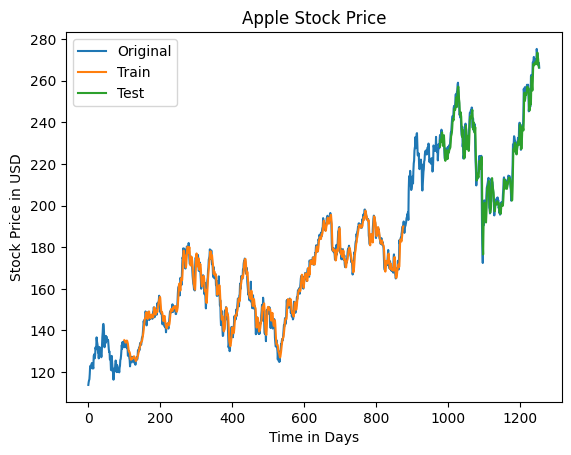

In [25]:
# PLotting
# Shifting train predictions
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
# Shifting test predictions
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict
# Baseline & predictions
plt.plot(scaler.inverse_transform(df1)) # Must add this line otherwise won't properly plot
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original','Train','Test'])
plt.title('Apple Stock Price')
plt.xlabel('Time in Days')
plt.ylabel('Stock Price in USD')
plt.show()

In [26]:
len(test_data)

377

In [27]:
x_input = test_data[277:].reshape(1,-1) # Taking previous 100 days data
x_input.shape

(1, 100)

In [28]:
temp_input = list(x_input) # Saving 100 prev days in var temp_input
temp_input = temp_input[0].tolist()

In [29]:
# Prediction for next 30 days
lst_output = []
n_steps = 100
i = 0
while (i<30): # 30 days
  if(len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input,verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(yhat.tolist())
    i = i+1
  else:
    x_input = x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i = i+1
print(lst_output)

[0.9492279]
101
1 day input [0.61771995 0.59541512 0.59578686 0.6027881  0.61065675 0.60291202
 0.58717472 0.59021066 0.59671623 0.59584882 0.60303594 0.61109046
 0.62298637 0.62143742 0.61902107 0.61976456 0.62081784 0.60359356
 0.58983891 0.58066914 0.54851301 0.55452292 0.55185874 0.61586121
 0.65786865 0.71561338 0.70216853 0.71747212 0.74027261 0.73686493
 0.72949195 0.72515489 0.72311029 0.69491945 0.68804213 0.70576208
 0.70204461 0.71536555 0.72267658 0.73550186 0.73289963 0.71790582
 0.77211896 0.78023544 0.77967782 0.76846344 0.74659232 0.69975217
 0.71982652 0.7448575  0.76115242 0.77013631 0.77534077 0.76846344
 0.81567534 0.88122677 0.87100372 0.85786865 0.88612144 0.87738538
 0.87100372 0.87224287 0.87732342 0.88773234 0.89324659 0.8850062
 0.88370508 0.89349442 0.86858736 0.81425031 0.82905824 0.82973978
 0.83946716 0.82775713 0.85774473 0.91939281 0.92267658 0.89591078
 0.90291202 0.92298637 0.96009913 0.96127633 0.96561338 0.97614622
 0.96976456 0.96158612 0.96771995 0

In [30]:
day_new = np.arange(1,101) # Previous 100 days
day_pred = np.arange(101,131) # Next 30 days prediction

In [31]:
len(df1)

1255

Text(0, 0.5, 'Stock Price in USD')

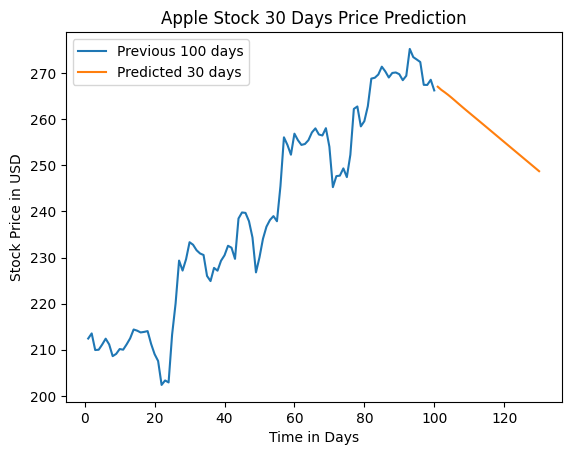

In [32]:
plt.plot(day_new,scaler.inverse_transform(df1[1155:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.legend(['Previous 100 days','Predicted 30 days'])
plt.title('Apple Stock 30 Days Price Prediction')
plt.xlabel('Time in Days')
plt.ylabel('Stock Price in USD')


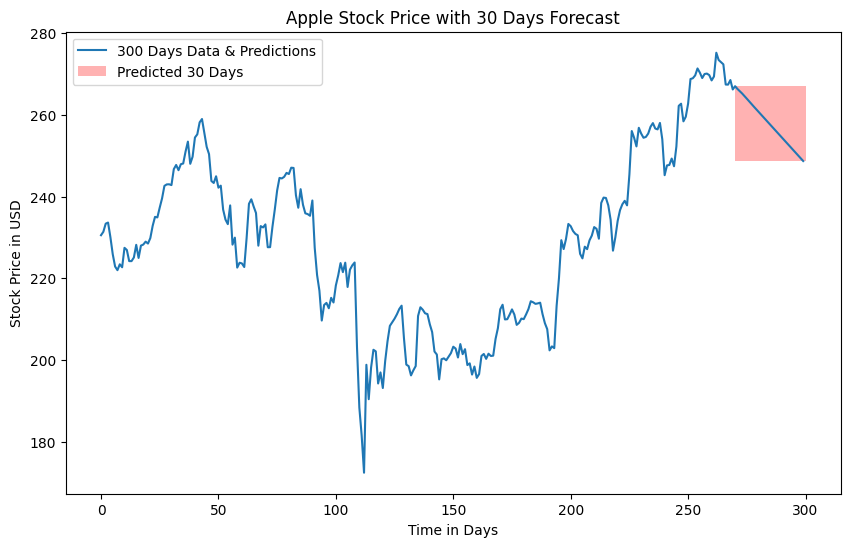

In [33]:
import matplotlib.patches as patches

df2_scaled = df1.tolist()
df2_scaled.extend(lst_output) # 30 days prediction added to previous 100 days

# Inverse transform the entire combined data for correct plotting
final_plot_data = scaler.inverse_transform(np.array(df2_scaled).reshape(-1, 1))

plt.figure(figsize=(10,6))
plt.plot(final_plot_data[985:]) # Plotting from index 985 onwards

# Calculate coordinates for the highlight box
# The original df1 has 1255 data points. The plot starts from index 985 of the combined data.
# So, the predicted data (which starts at index 1255 in the combined data) will start at:
start_x_in_plot = len(df1) - 985  # 1255 - 985 = 270

# Get the actual predicted values (inverse transformed)
predicted_values_actual = scaler.inverse_transform(np.array(lst_output).reshape(-1,1))
min_y_pred = np.min(predicted_values_actual)
max_y_pred = np.max(predicted_values_actual)

# Create a rectangle patch for highlighting
# Arguments: (xy), width, height
# xy: (x, y) lower-left corner of the rectangle
# width: number of predicted days
# height: range of predicted stock prices
rect = patches.Rectangle(
    (start_x_in_plot, min_y_pred),
    len(lst_output),
    max_y_pred - min_y_pred,
    facecolor='red',
    alpha=0.3,
    label='Predicted 30 Days'
)

# Add the rectangle to the current axes
plt.gca().add_patch(rect)

plt.title('Apple Stock Price with 30 Days Forecast')
plt.xlabel('Time in Days')
plt.ylabel('Stock Price in USD')
plt.legend(['300 Days Data & Predictions', 'Predicted 30 Days'])
plt.show()